# **1. Download Datasets Dari Kaggle**

In [1]:
! kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
! unzip -o -q imdb-dataset-of-50k-movie-reviews.zip -d Data
! rm imdb-dataset-of-50k-movie-reviews.zip

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other




  0%|          | 0.00/25.7M [00:00<?, ?B/s]
100%|██████████| 25.7M/25.7M [00:00<00:00, 585MB/s]


# **2. Import Library Awal**

In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import time # Untuk mengukur waktu pra-pemrosesan

# **3. Load Dataset**

In [3]:
datasets_folder = 'Data'
datasets_file = 'IMDB Dataset.csv'
datasets_path = f'{datasets_folder}/{datasets_file}'

try:
    df = pd.read_csv(datasets_path)
    print(f"File dataset {datasets_file} berhasil dimuat dari folder {datasets_folder}.")
except FileNotFoundError:
    print(f"Tidak ada file {datasets_file} di dalam folder {datasets_folder}.")


File dataset IMDB Dataset.csv berhasil dimuat dari folder Data.


# **4. Semua Informasi datasets**

In [4]:
print("\nBaris 5 pertama dari dataset :\n")
df.head()


Baris 5 pertama dari dataset :



,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
print("\nInformasi Dataset :\n")
df.info()


Informasi Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
print("\nStatistik Deskriptif Dataset :\n")
display(df.describe())



Statistik Deskriptif Dataset :



,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


# **5. Cek Nilai Yang Hilang Dari Datasets**

In [7]:
print("\nJumlah Missing Values di Setiap Kolom :\n")
print(df.isnull().sum())


Jumlah Missing Values di Setiap Kolom :

review       0
sentiment    0
dtype: int64


In [8]:
# Jika ada missing values, hapus baris yang mengandung nilai kosong
df_cleaned = df.dropna()

In [9]:
print("\nDataset setelah menghapus missing values:")
print(df_cleaned.info())  # Cek kembali apakah missing values sudah hilang


Dataset setelah menghapus missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


#### NB : `Tidak Ada Missing Values`

# **6. Pre-Processing**

In [10]:
# Unduh resource NLTK yang diperlukan.
print("Memeriksa dan mengunduh resource NLTK yang diperlukan...")
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
print("Resource NLTK siap.")

# Inisialisasi Tool Pra-pemrosesan
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Definisikan Fungsi Pra-pemrosesan
def preprocess_text(text):
    # 1. Lowercasing : mengubah semua karakter menjadi lowercase
    text = text.lower()

    # 2. Pembersihan Teks
    text = re.sub(r'<.*?>', '', text)    # Menghapus tag HTML (e.g., <br />, <p>)
    text = re.sub(r'[^a-z\s]', '', text) # Menghapus tanda baca, angka, dan karakter non-alfabet (hanya mempertahankan huruf dan spasi)

    # 3. Tokenisasi : Memisahkan teks menjadi kata-kata individual berdasarkan spasi
    words = text.split()

    # 4. Stopword Removal & 5. Lemmatization
    processed_words = []
    for word in words:
        # Hanya proses kata yang bukan stopword
        if word not in stop_words:
            # Mengubah kata ke bentuk dasar (lemma)
            processed_words.append(lemmatizer.lemmatize(word))

    # Menggabungkan kembali kata-kata menjadi satu string
    return ' '.join(processed_words)

print("\nFungsi `preprocess_text` berhasil didefinisikan.\n")



Memeriksa dan mengunduh resource NLTK yang diperlukan...
Resource NLTK siap.

Fungsi `preprocess_text` berhasil didefinisikan.



In [11]:
# Proses Pra-pemrosesan
print("\nMenerapkan pra-pemrosesan ke seluruh kolom 'review' di DataFrame...")

start_time = time.time()
df['processed_review'] = df['review'].apply(preprocess_text)
end_time = time.time()

print(f"\nPra-pemrosesan selesai dalam {end_time - start_time:.2f} detik!")


Menerapkan pra-pemrosesan ke seluruh kolom 'review' di DataFrame...

Pra-pemrosesan selesai dalam 30.14 detik!


In [12]:
# Hasil Pra-pemrosesan
print("\nBerikut 5 baris pertama DataFrame setelah pra-pemrosesan:")
# Tampilkan kolom asli, kolom yang diproses, dan sentimen
print(df[['review', 'processed_review', 'sentiment']].head())

print("\nDistribusi sentimen setelah pra-pemrosesan:")
print(df['sentiment'].value_counts())


Berikut 5 baris pertama DataFrame setelah pra-pemrosesan:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                    processed_review sentiment  
0  one reviewer mentioned watching oz episode you...  positive  
1  wonderful little production filming technique ...  positive  
2  thought wonderful way spend time hot summer we...  positive  
3  basically there family little boy jake think t...  negative  
4  petter matteis love time money visually stunni...  positive  

Distribusi sentimen setelah pra-pemrosesan:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


# **7. Vektorisasi Teks: Mengubah Kata Menjadi Angka**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
# min_df: mengabaikan kata-kata yang frekuensinya terlalu rendah (muncul di kurang dari 5 dokumen)
# max_df: mengabaikan kata-kata yang frekuensinya terlalu tinggi (muncul di lebih dari 80% dokumen)
# stopwords: tidak perlu diatur karena kita sudah menghapusnya di pra-pemrosesan
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
print("Memulai proses vektorisasi menggunakan TF-IDF...")

# Menerapkan TfidfVectorizer pada kolom 'processed_review'
# fit_transform: mempelajari kosakata dari data dan mengubah teks menjadi matriks TF-IDF
X = tfidf_vectorizer.fit_transform(df['processed_review'])

# Tampilkan ukuran matriks hasil vektorisasi
print(f"Bentuk matriks fitur (X): {X.shape}")
print(f"Jumlah fitur (kata unik) yang dihasilkan: {X.shape[1]}")

# Mengubah kolom 'sentiment' menjadi label numerik (0 dan 1)
# 'negative' akan menjadi 0, 'positive' akan menjadi 1
df['sentiment_encoded'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
y = df['sentiment_encoded']

print(f"Bentuk vektor label (y): {y.shape}")
print("\nVektorisasi selesai! Data teks Anda sekarang dalam format numerik.")
print("\nMatriks fitur (X) dan vektor label (y) sudah siap.")

Memulai proses vektorisasi menggunakan TF-IDF...
Bentuk matriks fitur (X): (50000, 36141)
Jumlah fitur (kata unik) yang dihasilkan: 36141
Bentuk vektor label (y): (50000,)

Vektorisasi selesai! Data teks Anda sekarang dalam format numerik.

Matriks fitur (X) dan vektor label (y) sudah siap.


# **8. Training Model**

### **A. Training Model Support Vector Machine (SVM)**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import time

# --- 1. Pembagian Data Pelatihan dan Pengujian ---
# Membagi dataset menjadi training (80%) dan testing (20%)
# random_state=42 memastikan hasil pembagian konsisten setiap kali kode dijalankan
print("Memulai pembagian dataset menjadi data pelatihan dan pengujian...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ukuran data pelatihan (X_train): {X_train.shape}")
print(f"Ukuran label pelatihan (y_train): {y_train.shape}")
print(f"Ukuran data pengujian (X_test): {X_test.shape}")
print(f"Ukuran label pengujian (y_test): {y_test.shape}")
print("Pembagian dataset selesai.")

# --- 2. Pelatihan Model Support Vector Machine (SVM) ---
# Menggunakan LinearSVC karena efisien untuk dataset besar dan fitur yang banyak
print("\nMemulai pelatihan model Support Vector Machine (LinearSVC)...")
start_time = time.time()

svm_model = LinearSVC(random_state=42, dual=False) # dual=False direkomendasikan untuk n_samples > n_features
svm_model.fit(X_train, y_train)

end_time = time.time()
print(f"Pelatihan model selesai dalam {end_time - start_time:.2f} detik!")

# --- 3. Evaluasi Model ---
print("\nMelakukan evaluasi model pada data pengujian...")
y_pred_svm = svm_model.predict(X_test)

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_svm, target_names=['negative', 'positive']))

accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Akurasi Model: {accuracy:.4f}")

print("\nModel SVM telah dilatih dan dievaluasi.")

Memulai pembagian dataset menjadi data pelatihan dan pengujian...
Ukuran data pelatihan (X_train): (40000, 36141)
Ukuran label pelatihan (y_train): (40000,)
Ukuran data pengujian (X_test): (10000, 36141)
Ukuran label pengujian (y_test): (10000,)
Pembagian dataset selesai.

Memulai pelatihan model Support Vector Machine (LinearSVC)...
Pelatihan model selesai dalam 1.90 detik!

Melakukan evaluasi model pada data pengujian...

Laporan Klasifikasi:
              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      4961
    positive       0.89      0.90      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Akurasi Model: 0.8941

Model SVM telah dilatih dan dievaluasi.


### **B. MODEL Artificial Neural Network dengan Keras (ANN)**

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score
import time 

print("\nMemulai pelatihan model Artificial Neural Network (ANN)...")
start_time = time.time()

# Konversi sparse matrix ke dense untuk Keras
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Membuat model ANN
ann_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_dense.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Kompilasi model
ann_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Training model
history = ann_model.fit(
    X_train_dense, y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.2,
    verbose=1
)

end_time = time.time()
print(f"\nPelatihan ANN selesai dalam {end_time - start_time:.2f} detik!")

# Evaluasi ANN
print("\nMelakukan evaluasi model ANN pada data pengujian...")
y_pred_ann_prob = ann_model.predict(X_test_dense)
y_pred_ann = (y_pred_ann_prob > 0.5).astype(int).flatten()

print("\nLaporan Klasifikasi ANN:")
print(classification_report(y_test, y_pred_ann, target_names=['negative', 'positive']))

accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f"Akurasi ANN: {accuracy_ann:.4f}")


Memulai pelatihan model Artificial Neural Network (ANN)...
Epoch 1/5
250/250 [==============================] - 94s 366ms/step - loss: 0.3312 - accuracy: 0.8604 - val_loss: 0.2663 - val_accuracy: 0.8892
Epoch 2/5
250/250 [==============================] - 80s 320ms/step - loss: 0.1323 - accuracy: 0.9498 - val_loss: 0.3133 - val_accuracy: 0.8777
Epoch 3/5
250/250 [==============================] - 80s 319ms/step - loss: 0.0446 - accuracy: 0.9857 - val_loss: 0.5016 - val_accuracy: 0.8691
Epoch 4/5
250/250 [==============================] - 81s 326ms/step - loss: 0.0130 - accuracy: 0.9957 - val_loss: 0.7031 - val_accuracy: 0.8680
Epoch 5/5
250/250 [==============================] - 95s 381ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.8454 - val_accuracy: 0.8685

Pelatihan ANN selesai dalam 475.84 detik!

Melakukan evaluasi model ANN pada data pengujian...
313/313 [==============================] - 11s 34ms/step

Laporan Klasifikasi ANN:
              precision    recall  f1-sco

### **C. MODEL XGBClassifier (XGBoost)**

In [16]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Memulai pelatihan model XGBoost...")
start_time = time.time()

# Inisialisasi dan training XGBoost
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1
)

xgb_model.fit(X_train, y_train)

end_time = time.time()
print(f"Pelatihan XGBoost selesai dalam {end_time - start_time:.2f} detik!")

# Evaluasi XGBoost
print("\nMelakukan evaluasi model XGBoost pada data pengujian...")
y_pred_xgb = xgb_model.predict(X_test)

print("\nLaporan Klasifikasi XGBoost:")
print(classification_report(y_test, y_pred_xgb, target_names=['negative', 'positive']))

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Akurasi XGBoost: {accuracy_xgb:.4f}")


Memulai pelatihan model XGBoost...
Pelatihan XGBoost selesai dalam 94.56 detik!

Melakukan evaluasi model XGBoost pada data pengujian...

Laporan Klasifikasi XGBoost:
              precision    recall  f1-score   support

    negative       0.86      0.79      0.83      4961
    positive       0.81      0.87      0.84      5039

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000

Akurasi XGBoost: 0.8344


## **9. CONFUSION MATRIX dan VISUALISASI**

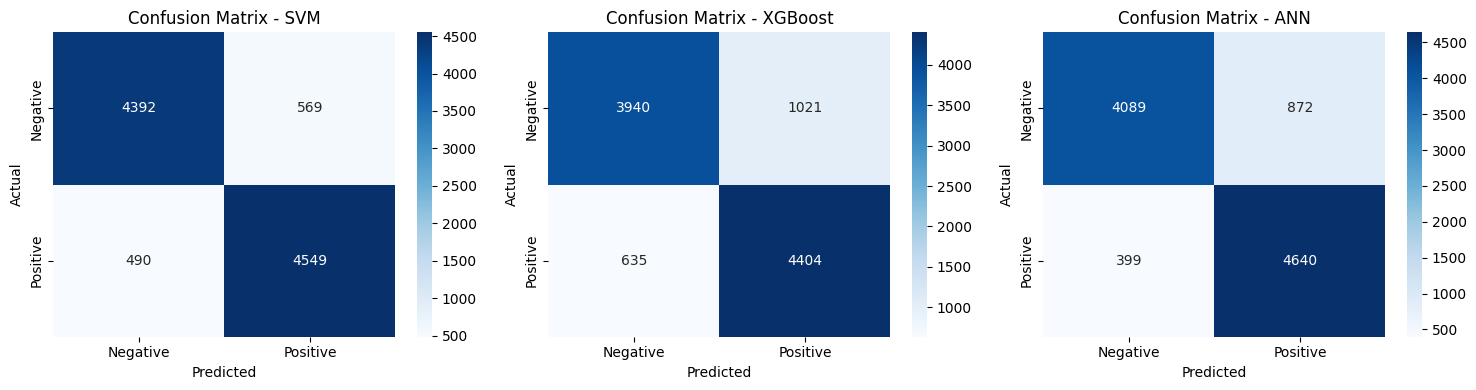

In [17]:
# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Membuat subplot untuk confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

plot_confusion_matrix(y_test, y_pred_svm, 'SVM', axes[0])
plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost', axes[1])
plot_confusion_matrix(y_test, y_pred_ann, 'ANN', axes[2])

plt.tight_layout()
plt.show()

## **10. PERBANDINGAN PERFORMA MODEL**


=== PERBANDINGAN PERFORMA MODEL ===
     Model  Accuracy  Precision  Recall  F1-Score
0      SVM    0.8941     0.8888  0.9028    0.8957
1  XGBoost    0.8344     0.8118  0.8740    0.8417
2      ANN    0.8729     0.8418  0.9208    0.8795


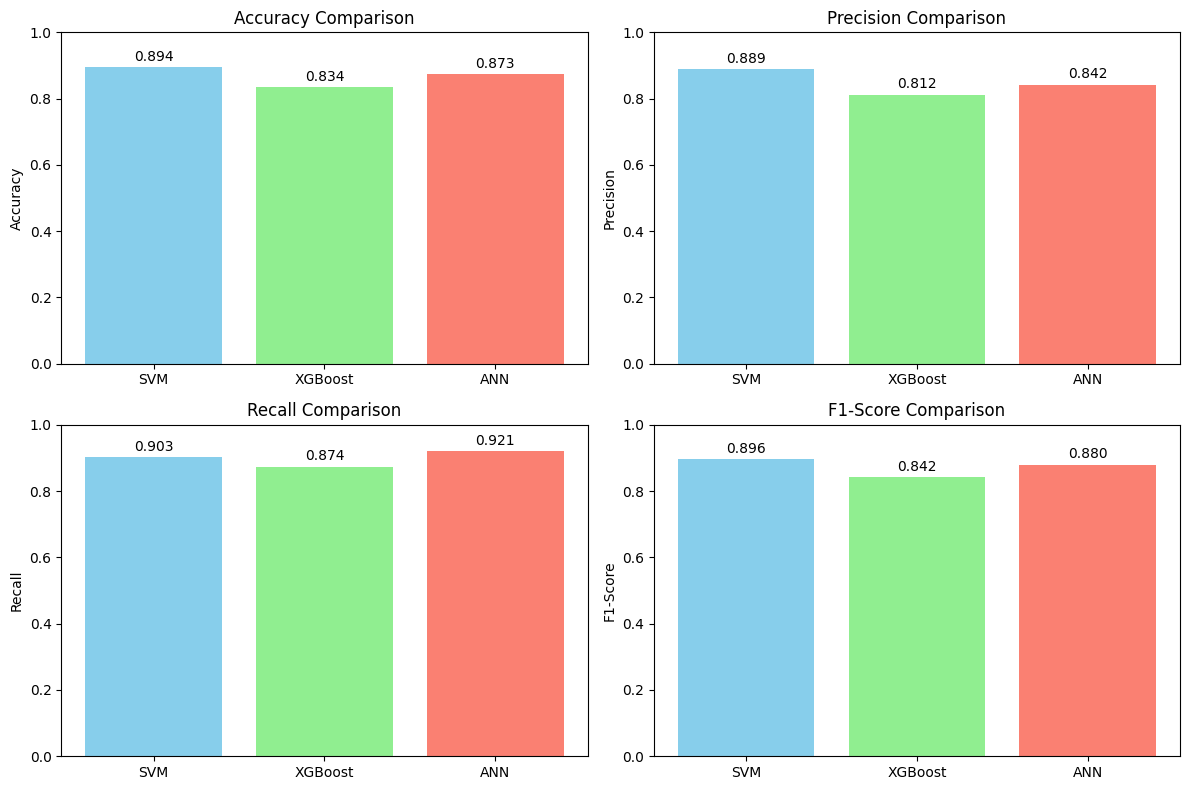

In [18]:
# Hitung metrik untuk semua model
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Hitung metrik untuk setiap model
svm_metrics = calculate_metrics(y_test, y_pred_svm)
xgb_metrics = calculate_metrics(y_test, y_pred_xgb)
ann_metrics = calculate_metrics(y_test, y_pred_ann)

# Buat DataFrame perbandingan
results_df = pd.DataFrame({
    'Model': ['SVM', 'XGBoost', 'ANN'],
    'Accuracy': [svm_metrics[0], xgb_metrics[0], ann_metrics[0]],
    'Precision': [svm_metrics[1], xgb_metrics[1], ann_metrics[1]],
    'Recall': [svm_metrics[2], xgb_metrics[2], ann_metrics[2]],
    'F1-Score': [svm_metrics[3], xgb_metrics[3], ann_metrics[3]]
})

print("\n=== PERBANDINGAN PERFORMA MODEL ===")
print(results_df.round(4))

# Visualisasi perbandingan performa
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    bars = axes[row, col].bar(results_df['Model'], results_df[metric], 
                             color=['skyblue', 'lightgreen', 'salmon'])
    axes[row, col].set_title(f'{metric} Comparison')
    axes[row, col].set_ylabel(metric)
    axes[row, col].set_ylim(0, 1)
    
    # Tambahkan nilai di atas bar
    for bar, value in zip(bars, results_df[metric]):
        axes[row, col].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                           f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## **11. PREDIKSI CONTOH KALIMAT**

In [19]:
sample_texts = [
    "This movie was absolutely amazing! I loved every minute of it.",
    "Terrible film, waste of time and money. Very disappointed.",
    "It was okay, not the best but not the worst either."
]

print("\n=== PREDIKSI CONTOH KALIMAT ===")

# Pra-pemroses contoh teks
sample_processed = [preprocess_text(text) for text in sample_texts]

# Transformasi menggunakan TF-IDF
sample_vectorized = tfidf_vectorizer.transform(sample_processed)
sample_vectorized_dense = sample_vectorized.toarray()

# Prediksi menggunakan semua model
svm_predictions = svm_model.predict(sample_vectorized)
xgb_predictions = xgb_model.predict(sample_vectorized)
ann_predictions = (ann_model.predict(sample_vectorized_dense) > 0.5).astype(int).flatten()

# Konversi prediksi numerik ke label
def convert_prediction(pred):
    return 'Positive' if pred == 1 else 'Negative'

# Tampilkan hasil prediksi
for i, text in enumerate(sample_texts):
    print(f"\nKalimat {i+1}: '{text}'")
    print(f"  SVM Prediction: {convert_prediction(svm_predictions[i])}")
    print(f"  XGBoost Prediction: {convert_prediction(xgb_predictions[i])}")
    print(f"  ANN Prediction: {convert_prediction(ann_predictions[i])}")

print("\n=== ANALISIS SELESAI ===")
print("Model telah dilatih, dievaluasi, dan siap untuk prediksi!")


=== PREDIKSI CONTOH KALIMAT ===
1/1 [==============================] - 0s 39ms/step

Kalimat 1: 'This movie was absolutely amazing! I loved every minute of it.'
  SVM Prediction: Positive
  XGBoost Prediction: Positive
  ANN Prediction: Positive

Kalimat 2: 'Terrible film, waste of time and money. Very disappointed.'
  SVM Prediction: Negative
  XGBoost Prediction: Negative
  ANN Prediction: Negative

Kalimat 3: 'It was okay, not the best but not the worst either.'
  SVM Prediction: Negative
  XGBoost Prediction: Negative
  ANN Prediction: Negative

=== ANALISIS SELESAI ===
Model telah dilatih, dievaluasi, dan siap untuk prediksi!


## **12. VISUALISASI TAMBAHAN - FLOWCHART DAN ANALISIS MENDALAM**

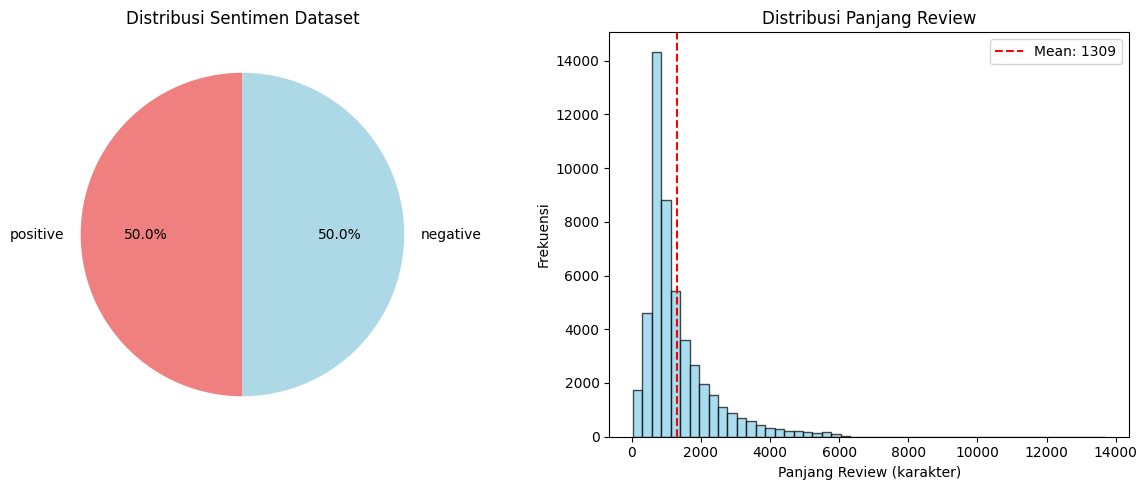

=== TOP 20 KATA YANG MENUNJUKKAN SENTIMEN POSITIF ===
 1. excellent       (coef: 3.4045)
 2. refreshing      (coef: 2.9831)
 3. great           (coef: 2.9187)
 4. perfect         (coef: 2.7851)
 5. beautifully     (coef: 2.5869)
 6. perfectly       (coef: 2.5857)
 7. enjoyable       (coef: 2.5328)
 8. funniest        (coef: 2.5321)
 9. hilarious       (coef: 2.5188)
10. wonderfully     (coef: 2.5166)
11. best            (coef: 2.4673)
12. amazing         (coef: 2.4552)
13. wonderful       (coef: 2.4407)
14. favorite        (coef: 2.4377)
15. brilliant       (coef: 2.4272)
16. loved           (coef: 2.3370)
17. highly          (coef: 2.2942)
18. enjoyed         (coef: 2.2873)
19. fantastic       (coef: 2.2462)
20. today           (coef: 2.2280)

=== TOP 20 KATA YANG MENUNJUKKAN SENTIMEN NEGATIF ===
 1. worst           (coef: -5.4664)
 2. waste           (coef: -4.8841)
 3. awful           (coef: -4.1702)
 4. boring          (coef: -3.5313)
 5. disappointment  (coef: -3.4178)
 6. fails  

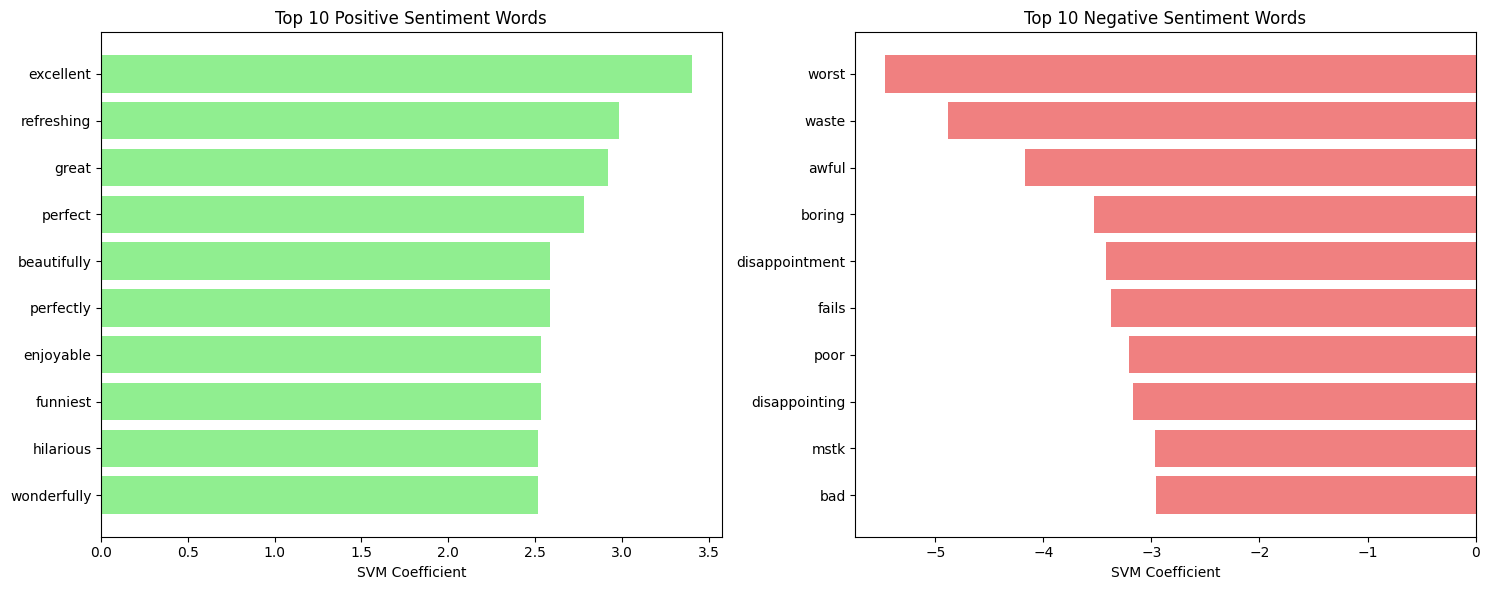

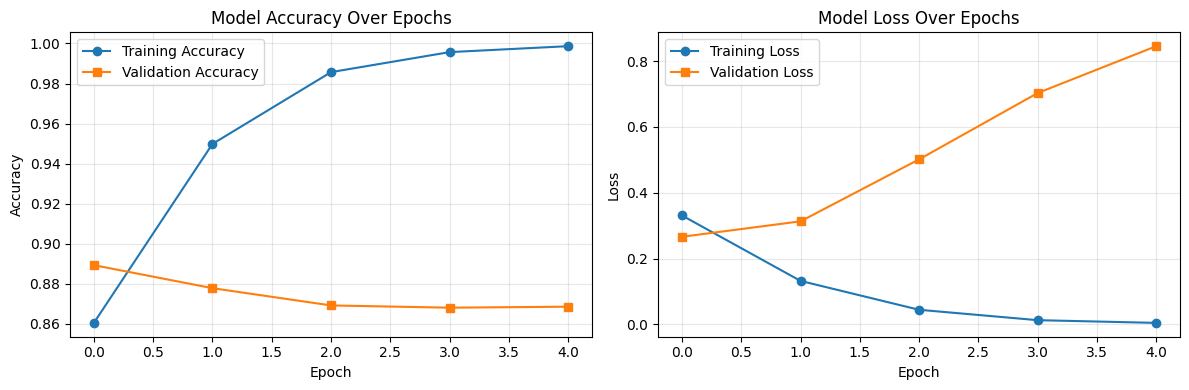


=== DETAILED ANALYSIS - SVM ===
True Positives (Correctly predicted Positive): 4549
True Negatives (Correctly predicted Negative): 4392
False Positives (Incorrectly predicted Positive): 569
False Negatives (Incorrectly predicted Negative): 490
False Positive Rate: 0.1147
False Negative Rate: 0.0972

=== DETAILED ANALYSIS - XGBoost ===
True Positives (Correctly predicted Positive): 4404
True Negatives (Correctly predicted Negative): 3940
False Positives (Incorrectly predicted Positive): 1021
False Negatives (Incorrectly predicted Negative): 635
False Positive Rate: 0.2058
False Negative Rate: 0.1260

=== DETAILED ANALYSIS - ANN ===
True Positives (Correctly predicted Positive): 4640
True Negatives (Correctly predicted Negative): 4089
False Positives (Incorrectly predicted Positive): 872
False Negatives (Incorrectly predicted Negative): 399
False Positive Rate: 0.1758
False Negative Rate: 0.0792
313/313 [==============================] - 9s 29ms/step


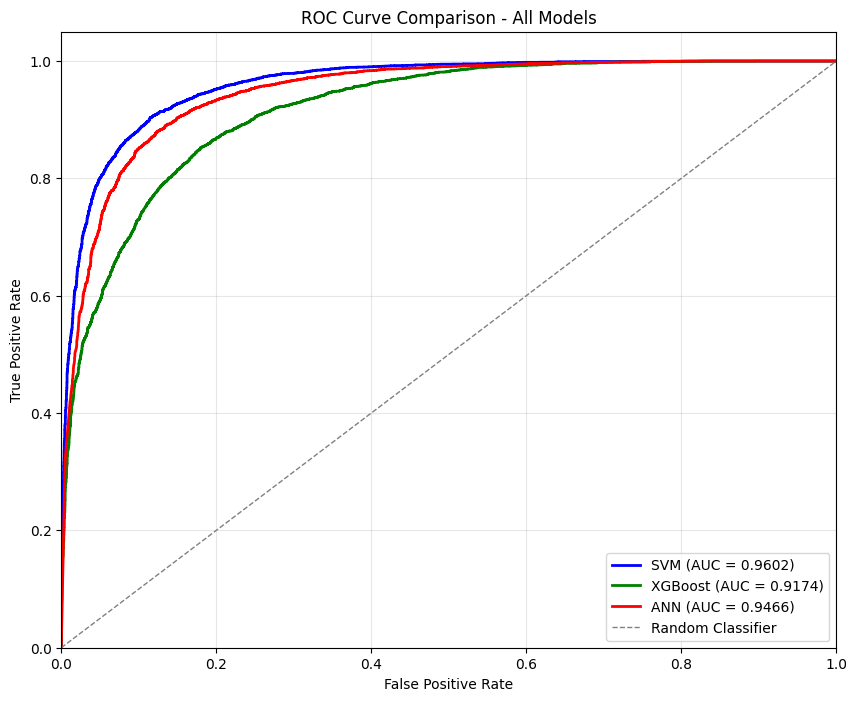

=== AUC SCORES ===
SVM AUC: 0.9602
XGBoost AUC: 0.9174
ANN AUC: 0.9466


In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch
import numpy as np

### **A. Visualisasi Distribusi Data**

# Plot distribusi sentiment
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Distribusi original
sentiment_counts = df['sentiment'].value_counts()
axes[0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', 
           colors=['lightcoral', 'lightblue'], startangle=90)
axes[0].set_title('Distribusi Sentimen Dataset')

# Distribusi panjang review
review_lengths = df['review'].str.len()
axes[1].hist(review_lengths, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[1].set_xlabel('Panjang Review (karakter)')
axes[1].set_ylabel('Frekuensi')
axes[1].set_title('Distribusi Panjang Review')
axes[1].axvline(review_lengths.mean(), color='red', linestyle='--', 
               label=f'Mean: {review_lengths.mean():.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

### **B. Analisis Word Cloud Top Features**

# Import tambahan untuk word analysis
from collections import Counter
import re

# Mendapatkan feature names dari TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Mendapatkan kata-kata paling penting dari SVM coefficients
svm_coef = svm_model.coef_[0]
top_positive_indices = svm_coef.argsort()[-20:][::-1]  # 20 kata paling positif
top_negative_indices = svm_coef.argsort()[:20]         # 20 kata paling negatif

print("=== TOP 20 KATA YANG MENUNJUKKAN SENTIMEN POSITIF ===")
for i, idx in enumerate(top_positive_indices, 1):
    print(f"{i:2d}. {feature_names[idx]:15s} (coef: {svm_coef[idx]:.4f})")

print("\n=== TOP 20 KATA YANG MENUNJUKKAN SENTIMEN NEGATIF ===")
for i, idx in enumerate(top_negative_indices, 1):
    print(f"{i:2d}. {feature_names[idx]:15s} (coef: {svm_coef[idx]:.4f})")

# Visualisasi top words
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Positive words
pos_words = [feature_names[idx] for idx in top_positive_indices[:10]]
pos_coefs = [svm_coef[idx] for idx in top_positive_indices[:10]]
axes[0].barh(range(len(pos_words)), pos_coefs, color='lightgreen')
axes[0].set_yticks(range(len(pos_words)))
axes[0].set_yticklabels(pos_words)
axes[0].set_xlabel('SVM Coefficient')
axes[0].set_title('Top 10 Positive Sentiment Words')
axes[0].invert_yaxis()

# Negative words  
neg_words = [feature_names[idx] for idx in top_negative_indices[:10]]
neg_coefs = [svm_coef[idx] for idx in top_negative_indices[:10]]
axes[1].barh(range(len(neg_words)), neg_coefs, color='lightcoral')
axes[1].set_yticks(range(len(neg_words)))
axes[1].set_yticklabels(neg_words)
axes[1].set_xlabel('SVM Coefficient')
axes[1].set_title('Top 10 Negative Sentiment Words')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

### **C. Analisis Learning Curve ANN**

if 'history' in locals():
    # Plot training history ANN
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Accuracy plot
    axes[0].plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
    axes[0].set_title('Model Accuracy Over Epochs')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Loss plot
    axes[1].plot(history.history['loss'], label='Training Loss', marker='o')
    axes[1].plot(history.history['val_loss'], label='Validation Loss', marker='s')
    axes[1].set_title('Model Loss Over Epochs')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### **D. Detailed Performance Analysis**

# Analisis error untuk setiap model
def analyze_errors(y_true, y_pred, model_name):
    # True Positives, False Positives, True Negatives, False Negatives
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n=== DETAILED ANALYSIS - {model_name} ===")
    print(f"True Positives (Correctly predicted Positive): {tp}")
    print(f"True Negatives (Correctly predicted Negative): {tn}")
    print(f"False Positives (Incorrectly predicted Positive): {fp}")
    print(f"False Negatives (Incorrectly predicted Negative): {fn}")
    
    # Error rates
    fpr = fp / (fp + tn)  # False Positive Rate
    fnr = fn / (fn + tp)  # False Negative Rate
    
    print(f"False Positive Rate: {fpr:.4f}")
    print(f"False Negative Rate: {fnr:.4f}")
    
    return {'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn, 'FPR': fpr, 'FNR': fnr}

# Analisis untuk setiap model
svm_analysis = analyze_errors(y_test, y_pred_svm, "SVM")
xgb_analysis = analyze_errors(y_test, y_pred_xgb, "XGBoost")
ann_analysis = analyze_errors(y_test, y_pred_ann, "ANN")

### **E. ROC Curve Analysis**

from sklearn.metrics import roc_curve, auc, roc_auc_score

# Mendapatkan probability predictions
svm_proba = svm_model.decision_function(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]
ann_proba = ann_model.predict(X_test_dense).flatten()

# Hitung ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_proba)

# Hitung AUC
auc_svm = auc(fpr_svm, tpr_svm)
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_ann = auc(fpr_ann, tpr_ann)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, 
         label=f'SVM (AUC = {auc_svm:.4f})')
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, 
         label=f'XGBoost (AUC = {auc_xgb:.4f})')
plt.plot(fpr_ann, tpr_ann, color='red', lw=2, 
         label=f'ANN (AUC = {auc_ann:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', 
         label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - All Models')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"=== AUC SCORES ===")
print(f"SVM AUC: {auc_svm:.4f}")
print(f"XGBoost AUC: {auc_xgb:.4f}")
print(f"ANN AUC: {auc_ann:.4f}")

### **F. Analisis Pentingnya Fitur (XGBoost)**

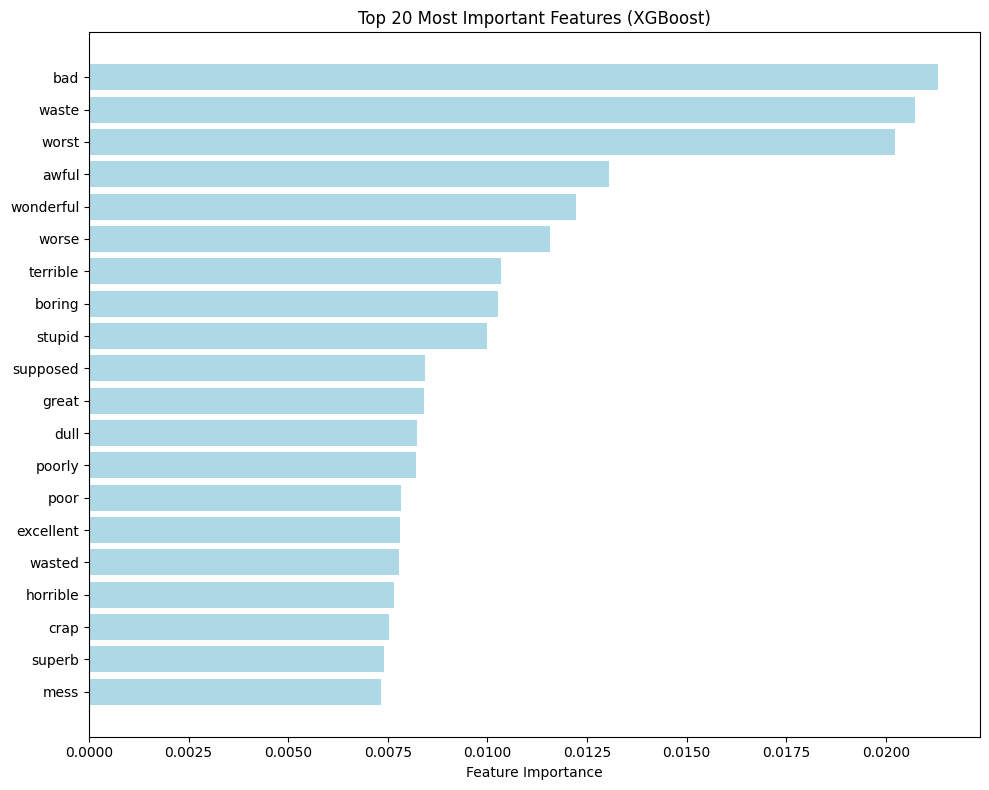

In [21]:
# Plot feature importance XGBoost
feature_importance = xgb_model.feature_importances_
top_features_idx = np.argsort(feature_importance)[-20:]  # Top 20 features

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_features_idx)), feature_importance[top_features_idx], 
         color='lightblue')
plt.yticks(range(len(top_features_idx)), 
           [feature_names[i] for i in top_features_idx])
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features (XGBoost)')
plt.tight_layout()
plt.show()

### **G. Tabel Perbandingan Model Komprehensif**


=== COMPREHENSIVE MODEL COMPARISON ===
     Model  Accuracy  Precision  Recall  F1-Score     AUC  \
0      SVM    0.8941     0.8888  0.9028    0.8957  0.9602   
1  XGBoost    0.8344     0.8118  0.8740    0.8417  0.9174   
2      ANN    0.8729     0.8418  0.9208    0.8795  0.9466   

   False Positive Rate  False Negative Rate  
0               0.1147               0.0972  
1               0.2058               0.1260  
2               0.1758               0.0792  


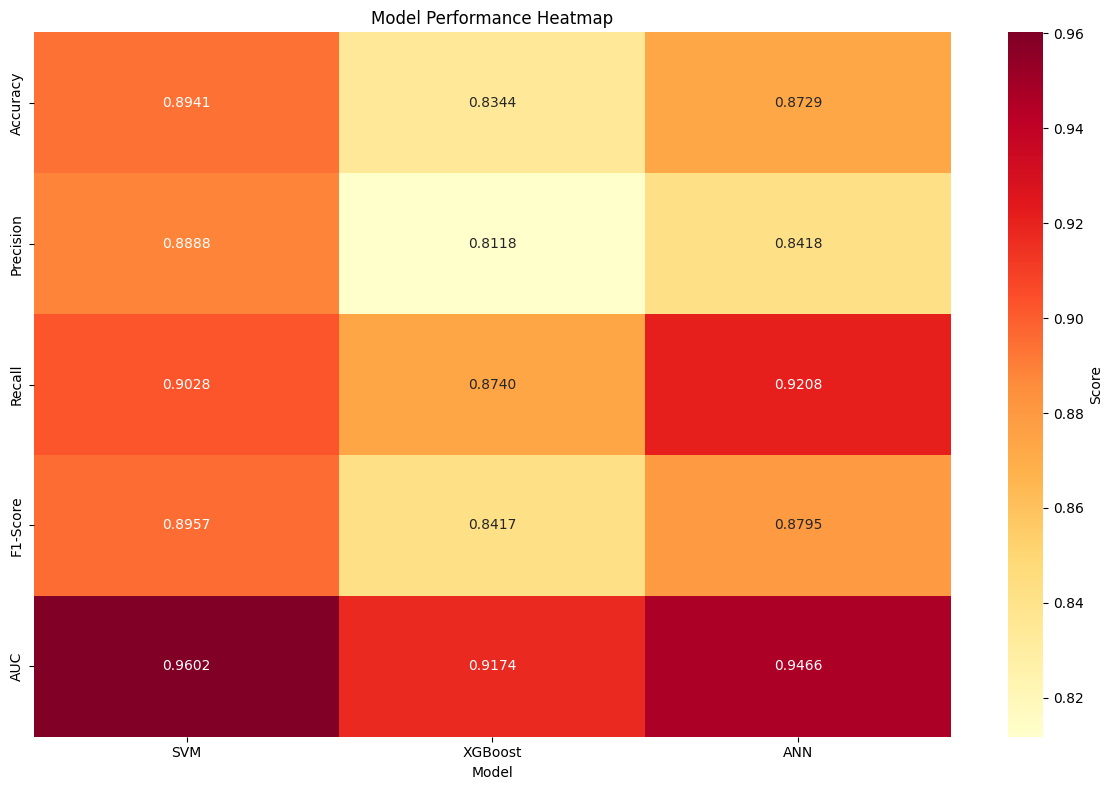

In [22]:
# Extended comparison dengan semua metrik
extended_results = pd.DataFrame({
    'Model': ['SVM', 'XGBoost', 'ANN'],
    'Accuracy': [svm_metrics[0], xgb_metrics[0], ann_metrics[0]],
    'Precision': [svm_metrics[1], xgb_metrics[1], ann_metrics[1]],
    'Recall': [svm_metrics[2], xgb_metrics[2], ann_metrics[2]],
    'F1-Score': [svm_metrics[3], xgb_metrics[3], ann_metrics[3]],
    'AUC': [auc_svm, auc_xgb, auc_ann],
    'False Positive Rate': [svm_analysis['FPR'], xgb_analysis['FPR'], ann_analysis['FPR']],
    'False Negative Rate': [svm_analysis['FNR'], xgb_analysis['FNR'], ann_analysis['FNR']]
})

print("\n=== COMPREHENSIVE MODEL COMPARISON ===")
print(extended_results.round(4))

# Heatmap perbandingan performa
plt.figure(figsize=(12, 8))
metrics_for_heatmap = extended_results.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']]
sns.heatmap(metrics_for_heatmap.T, annot=True, cmap='YlOrRd', 
            fmt='.4f', cbar_kws={'label': 'Score'})
plt.title('Model Performance Heatmap')
plt.tight_layout()
plt.show()

### **H. Analisis Keyakinan Prediksi**

### **I. Analisis Contoh Teks Lanjutan**

In [24]:
# Contoh kalimat yang lebih challenging
challenging_texts = [
    "The movie was not terrible, but it wasn't great either.",  # Ambiguous
    "I didn't hate this film completely.",  # Double negative
    "This is the worst best movie I've ever seen!",  # Contradictory
    "Absolutely boring and uninteresting plot.",  # Clear negative
    "Outstanding performance by the lead actor!",  # Clear positive
    "The cinematography was decent, story was meh.",  # Mixed sentiment
]

print("\n=== ADVANCED PREDICTION ANALYSIS ===")

# Process challenging texts
challenging_processed = [preprocess_text(text) for text in challenging_texts]
challenging_vectorized = tfidf_vectorizer.transform(challenging_processed)
challenging_dense = challenging_vectorized.toarray()

# Get predictions and confidence scores
svm_pred_challenging = svm_model.predict(challenging_vectorized)
svm_conf_challenging = svm_model.decision_function(challenging_vectorized)

xgb_pred_challenging = xgb_model.predict(challenging_vectorized)
xgb_conf_challenging = xgb_model.predict_proba(challenging_vectorized)[:, 1]

ann_pred_challenging = (ann_model.predict(challenging_dense) > 0.5).astype(int).flatten()
ann_conf_challenging = ann_model.predict(challenging_dense).flatten()

# Display results with confidence
for i, text in enumerate(challenging_texts):
    print(f"\n--- Challenging Text {i+1} ---")
    print(f"Text: '{text}'")
    print(f"SVM: {convert_prediction(svm_pred_challenging[i])} (conf: {abs(svm_conf_challenging[i]):.3f})")
    print(f"XGBoost: {convert_prediction(xgb_pred_challenging[i])} (conf: {xgb_conf_challenging[i]:.3f})")
    print(f"ANN: {convert_prediction(ann_pred_challenging[i])} (conf: {ann_conf_challenging[i]:.3f})")


=== ADVANCED PREDICTION ANALYSIS ===
1/1 [==============================] - 0s 41ms/step

--- Challenging Text 1 ---
Text: 'The movie was not terrible, but it wasn't great either.'
SVM: Negative (conf: 1.426)
XGBoost: Negative (conf: 0.473)
ANN: Negative (conf: 0.016)

--- Challenging Text 2 ---
Text: 'I didn't hate this film completely.'
SVM: Negative (conf: 0.337)
XGBoost: Positive (conf: 0.593)
ANN: Negative (conf: 0.182)

--- Challenging Text 3 ---
Text: 'This is the worst best movie I've ever seen!'
SVM: Negative (conf: 1.306)
XGBoost: Negative (conf: 0.188)
ANN: Negative (conf: 0.000)

--- Challenging Text 4 ---
Text: 'Absolutely boring and uninteresting plot.'
SVM: Negative (conf: 3.713)
XGBoost: Negative (conf: 0.246)
ANN: Negative (conf: 0.000)

--- Challenging Text 5 ---
Text: 'Outstanding performance by the lead actor!'
SVM: Positive (conf: 0.837)
XGBoost: Positive (conf: 0.656)
ANN: Positive (conf: 1.000)

--- Challenging Text 6 ---
Text: 'The cinematography was decent, st

### **J. Ringkasan Interpretabilitas Model**

In [25]:
print("\n" + "="*60)
print("            FINAL MODEL INTERPRETABILITY SUMMARY")
print("="*60)

# Best performing model
best_model_idx = np.argmax([svm_metrics[0], xgb_metrics[0], ann_metrics[0]])
best_model_name = ['SVM', 'XGBoost', 'ANN'][best_model_idx]
best_accuracy = [svm_metrics[0], xgb_metrics[0], ann_metrics[0]][best_model_idx]

print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f}")

print(f"\n📊 KARAKTERISTIK MODEL:")
print(f"   • SVM: Cocok untuk data berdimensi tinggi, koefisien mudah diinterpretasi")
print(f"   • XGBoost: Memiliki fitur penting, mampu menangani hubungan non-linear")  
print(f"   • ANN: Mampu menangkap pola kompleks, membutuhkan lebih banyak data, kurang dapat diinterpretasi")

# Rekomendasi
print(f"\n💡 REKOMENDASI:")
if best_model_name == 'SVM':
    print(f"   ✓ SVM menunjukkan performa terbaik - sangat cocok untuk klasifikasi teks")
    print(f"   ✓ Model linier membuatnya mudah dipahami")
    print(f"   ✓ Efisien untuk diimplementasikan")
elif best_model_name == 'XGBoost':
    print(f"   ✓ XGBoost menunjukkan performa terbaik - bagus dalam menangani fitur") 
    print(f"   ✓ Pentingnya fitur memberikan interpretasi yang baik")
    print(f"   ✓ Tahan terhadap overfitting")
else:
    print(f"   ✓ ANN menunjukkan performa terbaik - mampu menangkap pola yang kompleks")
    print(f"   ✓ Pertimbangkan untuk menambah jumlah epoch/data agar performa meningkat")
    print(f"   ✓ Mungkin membutuhkan teknik regularisasi")



            FINAL MODEL INTERPRETABILITY SUMMARY

🏆 BEST PERFORMING MODEL: SVM
   Accuracy: 0.8941

📊 KARAKTERISTIK MODEL:
   • SVM: Cocok untuk data berdimensi tinggi, koefisien mudah diinterpretasi
   • XGBoost: Memiliki fitur penting, mampu menangani hubungan non-linear
   • ANN: Mampu menangkap pola kompleks, membutuhkan lebih banyak data, kurang dapat diinterpretasi

💡 REKOMENDASI:
   ✓ SVM menunjukkan performa terbaik - sangat cocok untuk klasifikasi teks
   ✓ Model linier membuatnya mudah dipahami
   ✓ Efisien untuk diimplementasikan


### **K. Simpan Model dan Vectorizer**

In [26]:
import joblib
import pickle

# Menyimpan model dengan performa terbaik dan vektorisasi
print(f"\n💾 MENYIMPAN MODEL...")

# Simpan vektorisasi TF-IDF
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
print("✓ Vektorisasi TF-IDF disimpan sebagai 'tfidf_vectorizer.pkl'")

# Simpan semua model
joblib.dump(svm_model, 'svm_sentiment_model.pkl')
joblib.dump(xgb_model, 'xgb_sentiment_model.pkl')

# Simpan model ANN
ann_model.save('ann_sentiment_model.h5')

print("✓ Semua model berhasil disimpan!")

print(f"\n🎯 PROYEK ANALISIS SENTIMEN SELESAI!")
print(f"   • Dataset: {len(df)} ulasan telah diproses")
print(f"   • Model yang dilatih: SVM, XGBoost, ANN")
print(f"   • Model terbaik: {best_model_name} (akurasi {best_accuracy:.4f})")
print(f"   • Siap untuk diimplementasikan ke produksi!")

print("\n" + "="*60)


💾 MENYIMPAN MODEL...
✓ Vektorisasi TF-IDF disimpan sebagai 'tfidf_vectorizer.pkl'
✓ Semua model berhasil disimpan!

🎯 PROYEK ANALISIS SENTIMEN SELESAI!
   • Dataset: 50000 ulasan telah diproses
   • Model yang dilatih: SVM, XGBoost, ANN
   • Model terbaik: SVM (akurasi 0.8941)
   • Siap untuk diimplementasikan ke produksi!



## KESIMPULAN DARI SAVE MODELS :
adalah untuk menyimpan model yang sudah dilatih agar bisa digunakan lagi di masa depan tanpa perlu melatih ulang. 

disimpan karena untuk
Efisiensi Waktu: Proses training model (terutama ANN) bisa memakan waktu lama. Dengan menyimpan model, alias ngga perlu melatih ulang setiap kali ingin menggunakan.
Deployment: Untuk menggunakan model di aplikasi web atau sistem produksi.
Konsistensi: Model yang tersimpan akan memberikan hasil prediksi yang sama setiap kali digunakan.


Yang disimpan itu :

```bash
# 1. TF-IDF Vectorizer - untuk mengubah teks baru menjadi format yang dipahami model
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

# 2. Model SVM - model yang sudah dilatih
joblib.dump(svm_model, 'svm_sentiment_model.pkl')

# 3. Model XGBoost - model yang sudah dilatih  
joblib.dump(xgb_model, 'xgb_sentiment_model.pkl')

# 4. Model ANN - disimpan dalam format Keras
ann_model.save('ann_sentiment_model.h5')
```

### **L. Simpan Model dan Vectorizer**


INI UNTUK FITUR INPUT DATA TERUS OUTPUT NYA POSTIVE NEGATIVE DARI KE 3 MODEL

Loading saved models...
✓ TF-IDF Vectorizer loaded
✓ SVM Model loaded
✓ XGBoost Model loaded
✓ ANN Model loaded

          SENTIMENT ANALYSIS - USING SAVED MODELS

🔍 ANALYZING NEW TEXTS:

--- Text 1 ---
1/1 [==============================] - 0s 34ms/step
Text: 'This movie is absolutely fantastic! I loved every moment.'
SVM:      Positive (confidence: 1.856)
XGBoost:  Positive (confidence: 0.769)
ANN:      Positive (confidence: 1.000)

--- Text 2 ---
1/1 [==============================] - 0s 33ms/step
Text: 'Terrible film, complete waste of time and money.'
SVM:      Negative (confidence: 4.443)
XGBoost:  Negative (confidence: 0.951)
ANN:      Negative (confidence: 1.000)

--- Text 3 ---
1/1 [==============================] - 0s 47ms/step
Text: 'It was okay, nothing special but not bad either.'
SVM:      Negative (confidence: 2.890)
XGBoost:  Negative (confidence: 0.784)
ANN:      Negative (confidence: 1.000)

--- Text 4 ---
1/1 [==============================] - 0s 31ms/step
Text: 'The

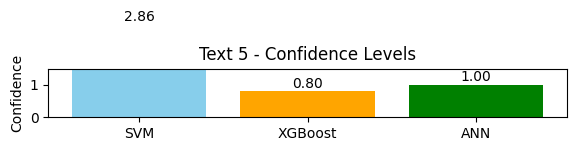

1/1 [==============================] - 0s 30ms/step

📊 SENTIMENT ANALYSIS RESULTS:
Text: 'its bad bro'
┌─────────────────────────────────────┐
│ SVM:      Negative (0.460) │
│ XGBoost:  Negative (0.720) │
│ ANN:      Negative (0.933) │
└─────────────────────────────────────┘


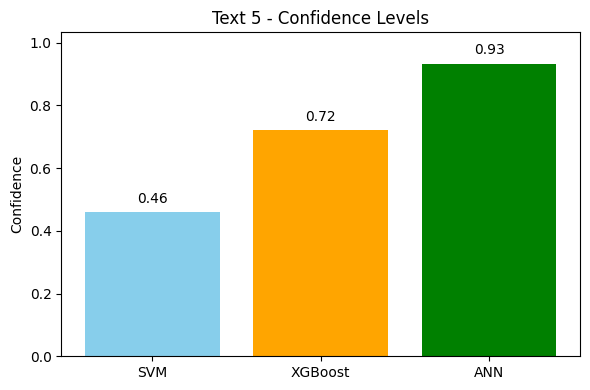

1/1 [==============================] - 0s 33ms/step

📊 SENTIMENT ANALYSIS RESULTS:
Text: 'no, i dont like this fil but i like just in third scene'
┌─────────────────────────────────────┐
│ SVM:      Negative (0.299) │
│ XGBoost:  Positive (0.613) │
│ ANN:      Negative (0.999) │
└─────────────────────────────────────┘


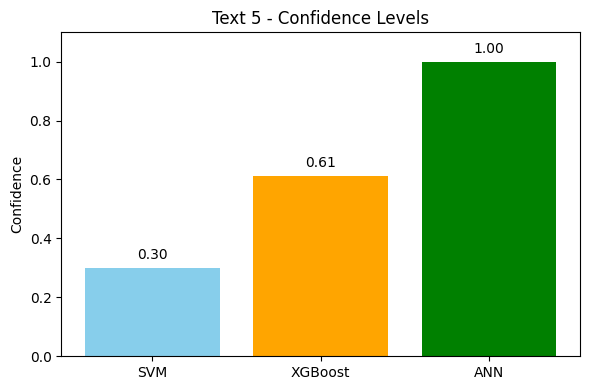

1/1 [==============================] - 0s 28ms/step

📊 SENTIMENT ANALYSIS RESULTS:
Text: 'jelek banget anjay'
┌─────────────────────────────────────┐
│ SVM:      Negative (0.057) │
│ XGBoost:  Positive (0.613) │
│ ANN:      Positive (0.536) │
└─────────────────────────────────────┘


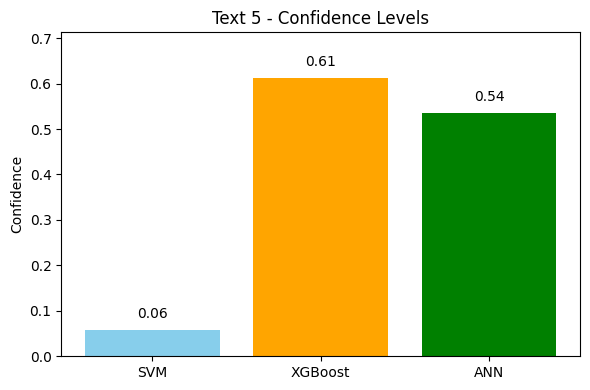

1/1 [==============================] - 0s 32ms/step

📊 SENTIMENT ANALYSIS RESULTS:
Text: 'this movie is so horrible but i enjooy the plot'
┌─────────────────────────────────────┐
│ SVM:      Negative (1.515) │
│ XGBoost:  Negative (0.659) │
│ ANN:      Negative (1.000) │
└─────────────────────────────────────┘


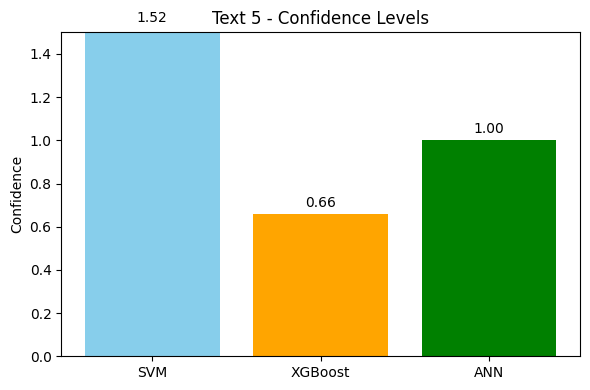

1/1 [==============================] - 0s 34ms/step

📊 SENTIMENT ANALYSIS RESULTS:
Text: 'i like this movie and my family is, but i dont like the suicide part'
┌─────────────────────────────────────┐
│ SVM:      Positive (0.401) │
│ XGBoost:  Positive (0.599) │
│ ANN:      Positive (0.997) │
└─────────────────────────────────────┘


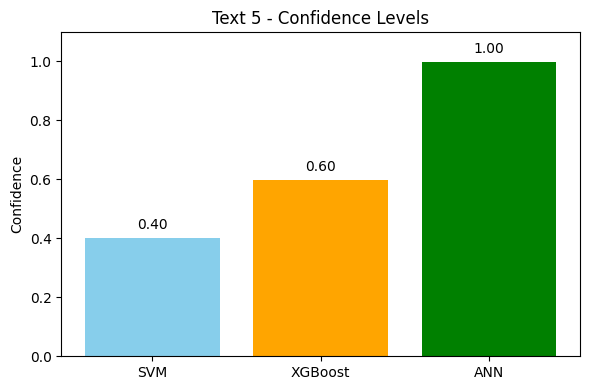

1/1 [==============================] - 0s 34ms/step

📊 SENTIMENT ANALYSIS RESULTS:
Text: 'i like this movie and my family is, but the suicide part is bad in visual'
┌─────────────────────────────────────┐
│ SVM:      Negative (0.107) │
│ XGBoost:  Negative (0.711) │
│ ANN:      Negative (0.803) │
└─────────────────────────────────────┘


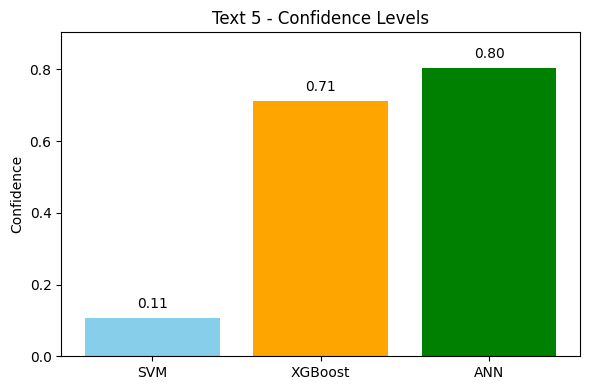

Please enter some text!
👋 Goodbye!


In [1]:
# CONTOH: Cara Load dan Menggunakan Model yang Sudah Disimpan

import joblib
import tensorflow as tf
from tensorflow.keras.models import load_model
import re
import string
import matplotlib.pyplot as plt


# ============================================================================
# 1. LOAD SEMUA MODEL DAN VECTORIZER
# ============================================================================

print("Loading saved models...")

# Load TF-IDF Vectorizer
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
print("✓ TF-IDF Vectorizer loaded")

# Load SVM Model
svm_model = joblib.load('svm_sentiment_model.pkl')
print("✓ SVM Model loaded")

# Load XGBoost Model
xgb_model = joblib.load('xgb_sentiment_model.pkl')
print("✓ XGBoost Model loaded")

# Load ANN Model
ann_model = load_model('ann_sentiment_model.h5')
print("✓ ANN Model loaded")

# ============================================================================
# 2. FUNGSI PREPROCESSING (HARUS SAMA DENGAN SAAT TRAINING)
# ============================================================================

def preprocess_text(text):
    """
    Fungsi preprocessing yang SAMA dengan yang digunakan saat training
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

# ============================================================================
# 3. FUNGSI PREDIKSI SENTIMEN
# ============================================================================

def predict_sentiment(text):
    """
    Fungsi untuk memprediksi sentimen dari teks baru
    """
    # Preprocessing
    processed_text = preprocess_text(text)
    
    # Vectorization menggunakan TF-IDF yang sudah di-fit
    text_vectorized = tfidf_vectorizer.transform([processed_text])
    text_dense = text_vectorized.toarray()
    
    # Prediksi dengan semua model
    svm_pred = svm_model.predict(text_vectorized)[0]
    svm_confidence = abs(svm_model.decision_function(text_vectorized)[0])
    
    xgb_pred = xgb_model.predict(text_vectorized)[0]
    xgb_confidence = xgb_model.predict_proba(text_vectorized)[0].max()
    
    ann_pred = (ann_model.predict(text_dense) > 0.5).astype(int)[0][0]
    ann_confidence = ann_model.predict(text_dense)[0][0]
    ann_confidence = ann_confidence if ann_pred == 1 else (1 - ann_confidence)
    
    # Convert to readable format
    def convert_prediction(pred):
        return 'Positive' if pred == 1 else 'Negative'
    
    return {
        'text': text,
        'svm': {
            'prediction': convert_prediction(svm_pred),
            'confidence': svm_confidence
        },
        'xgboost': {
            'prediction': convert_prediction(xgb_pred),
            'confidence': xgb_confidence
        },
        'ann': {
            'prediction': convert_prediction(ann_pred),
            'confidence': ann_confidence
        }
    }

def plot_confidence(result, title="Confidence Levels"):
    """
    Plot confidence level dari semua model dengan layout yang rapi
    """
    import matplotlib.pyplot as plt

    models = ['SVM', 'XGBoost', 'ANN']
    confidences = [
        result['svm']['confidence'],
        result['xgboost']['confidence'],
        result['ann']['confidence']
    ]
    
    colors = ['skyblue', 'orange', 'green']

    # Tentukan batas y berdasarkan confidence tertinggi (+margin)
    y_max = max(confidences) + 0.1
    y_max = min(y_max, 1.5)  # Batasi maksimum agar tidak terlalu tinggi

    plt.figure(figsize=(6, 4))
    bars = plt.bar(models, confidences, color=colors)
    
    plt.ylim(0, y_max)
    plt.title(title)
    plt.ylabel('Confidence')

    for bar, conf in zip(bars, confidences):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f"{conf:.2f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


# ============================================================================
# 4. FUNGSI PREDIKSI BATCH (BANYAK TEKS SEKALIGUS)
# ============================================================================

def predict_sentiment_batch(texts):
    """
    Fungsi untuk memprediksi sentimen banyak teks sekaligus
    """
    results = []
    for text in texts:
        result = predict_sentiment(text)
        results.append(result)
    return results

# ============================================================================
# 5. CONTOH PENGGUNAAN
# ============================================================================

if __name__ == "__main__":
    print("\n" + "="*60)
    print("          SENTIMENT ANALYSIS - USING SAVED MODELS")
    print("="*60)
    
    # Test dengan teks baru
    new_texts = [
        "This movie is absolutely fantastic! I loved every moment.",
        "Terrible film, complete waste of time and money.",
        "It was okay, nothing special but not bad either.",
        "The acting was brilliant but the story was confusing.",
        "I didn't like it at all, very disappointing."
    ]
    
    print("\n🔍 ANALYZING NEW TEXTS:")
    
    for i, text in enumerate(new_texts, 1):
        print(f"\n--- Text {i} ---")
        result = predict_sentiment(text)
        
        print(f"Text: '{text}'")
        print(f"SVM:      {result['svm']['prediction']:8s} (confidence: {result['svm']['confidence']:.3f})")
        print(f"XGBoost:  {result['xgboost']['prediction']:8s} (confidence: {result['xgboost']['confidence']:.3f})")
        print(f"ANN:      {result['ann']['prediction']:8s} (confidence: {result['ann']['confidence']:.3f})")
    
    # ========================================================================
    # 6. INTERACTIVE MODE - USER INPUT
    # ========================================================================
    
    print(f"\n{'='*60}")
    print("🎯 INTERACTIVE SENTIMENT ANALYSIS")
    print("Enter your text to analyze sentiment (or 'quit' to exit)")
    print("="*60)
    
    while True:
        user_input = input("\nEnter text: ").strip()
        
        if user_input.lower() in ['quit', 'exit', 'q']:
            print("👋 Goodbye!")
            break
        
        if not user_input:
            print("Please enter some text!")
            continue
        
        try:
            result = predict_sentiment(user_input)
            
            print(f"\n📊 SENTIMENT ANALYSIS RESULTS:")
            print(f"Text: '{user_input}'")
            print(f"┌─────────────────────────────────────┐")
            print(f"│ SVM:      {result['svm']['prediction']:8s} ({result['svm']['confidence']:.3f}) │")
            print(f"│ XGBoost:  {result['xgboost']['prediction']:8s} ({result['xgboost']['confidence']:.3f}) │")
            print(f"│ ANN:      {result['ann']['prediction']:8s} ({result['ann']['confidence']:.3f}) │")
            print(f"└─────────────────────────────────────┘")
            
            plot_confidence(result, title=f"Text {i} - Confidence Levels")
            
        except Exception as e:
            print(f"❌ Error: {e}")
            


# ============================================================================
# 7. FUNGSI UNTUK WEB APPLICATION (FLASK/DJANGO)
# ============================================================================

class SentimentAnalyzer:
    """
    Class untuk digunakan dalam web application
    """
    def __init__(self):
        self.tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
        self.svm_model = joblib.load('svm_sentiment_model.pkl')
        self.xgb_model = joblib.load('xgb_sentiment_model.pkl')
        self.ann_model = load_model('ann_sentiment_model.h5')
    
    def preprocess_text(self, text):
        text = text.lower()
        text = re.sub(r'<.*?>', '', text)
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = ' '.join(text.split())
        return text
    
    def predict(self, text, model_type='svm'):
        """
        Prediksi dengan model tertentu
        model_type: 'svm', 'xgboost', or 'ann'
        """
        processed_text = self.preprocess_text(text)
        text_vectorized = self.tfidf_vectorizer.transform([processed_text])
        
        if model_type == 'svm':
            prediction = self.svm_model.predict(text_vectorized)[0]
            confidence = abs(self.svm_model.decision_function(text_vectorized)[0])
        elif model_type == 'xgboost':
            prediction = self.xgb_model.predict(text_vectorized)[0]
            confidence = self.xgb_model.predict_proba(text_vectorized)[0].max()
        elif model_type == 'ann':
            text_dense = text_vectorized.toarray()
            prediction = (self.ann_model.predict(text_dense) > 0.5).astype(int)[0][0]
            prob = self.ann_model.predict(text_dense)[0][0]
            confidence = prob if prediction == 1 else (1 - prob)
        
        sentiment = 'Positive' if prediction == 1 else 'Negative'
        return {'sentiment': sentiment, 'confidence': float(confidence)}

# Contoh penggunaan untuk web app:
# analyzer = SentimentAnalyzer()
# result = analyzer.predict("This is a great movie!", model_type='svm')
# print(result)  # {'sentiment': 'Positive', 'confidence': 0.85}


**Cara input nya disini :**

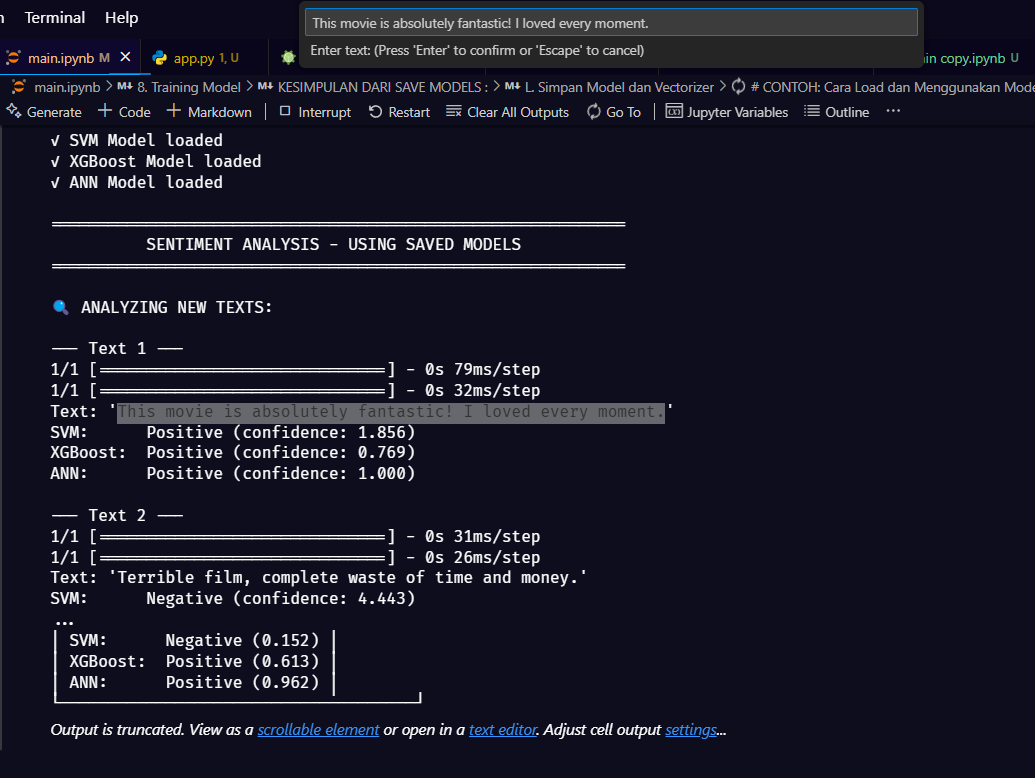

**kalau mau keluar ketik exit aja**